In [2]:
# Import Modules from the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Let's create some data

In [3]:
# Seed of the Random Number Generator
np.random.seed(1001)

In [4]:
# Data Generating Function
def f(x, sigma):
    return 0.3*x - 0.73 + np.random.randn(x.shape[-1])*sigma

In [5]:
# Training Data
N_data = 100
x_data = np.random.rand(N_data)*10
y_data = f(x_data, 0.2)

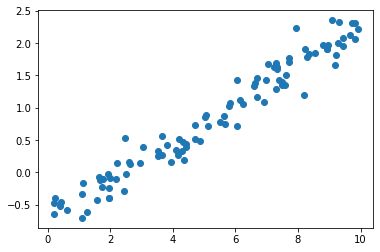

In [6]:
plt.plot(x_data, y_data, 'o')

In [7]:
x_data[0], y_data[0]

(3.0623217954880544, 0.3956156126815624)

### Now, let's sample some random model parameters from a normal distribution

In [8]:
N_model = 50

W = np.random.randn(2, N_model)
W[0, :] = W[0, :]* 0.1 # linear term
W[1, :] = W[1, :]* 0.5   # constant term

In [9]:
W[0].std(), W[1].std(), W[0].mean(), W[1].mean()

(0.09720287356572616,
 0.48576320096475284,
 -3.92687844742437e-05,
 -0.029405119453685787)

Hint:

$x \sim \mathcal{N}(\mu, \sigma^2)$

is equivalent to

$x = \mu + \sigma \cdot z, \qquad z \sim \mathcal{N}(0, 1)$

### Calculate the y-values...

In [10]:
xx = np.linspace(0, 10, 101)
X = np.vander(xx, 2)

In [11]:
W.shape, X.shape

((2, 50), (101, 2))

In [12]:
y = X @ W

In [13]:
y.shape

(101, 50)

### ... and visualize the result:

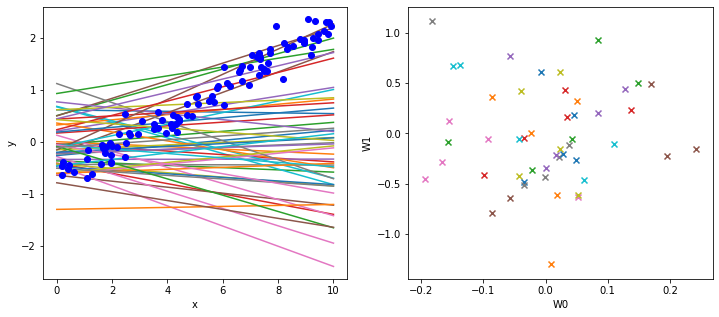

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[1].plot([0], [0])

for i in range(N_model):
    ax[0].plot(xx, y[:,i], label=f"{i}")
    ax[1].scatter(W[0,i], W[1,i], marker="x", label=f"{i}")

ax[0].plot(x_data, y_data, 'o', color="blue")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_xlabel("W0")
ax[1].set_ylabel("W1")

if N_model <= 10:
    ax[0].legend()
    ax[1].legend()

Let's call the left graph function space view, and the right graph weight space view.

### Let's assume a simple error model for our data:

\begin{equation}
t = y(x,w) + \epsilon
\end{equation}

\begin{equation}
\epsilon \sim \mathcal{N}(0, \sigma_e^2 \mathbb{I}), \qquad \sigma_e^2 \mathbb{I} = \Sigma_e
\end{equation}




\begin{equation}
p(t \vert x, \mathbf{w}) = \mathcal{N}(t; y(x,\mathbf{w}), \sigma_e) = \mathcal{N}(t;  y(x,w), \Sigma_e)
\end{equation}

In [15]:
#x_data.shape, X

### Can you calculate the likelihood of the data given the sampled model parameters?

Likelihood of one data sample:
$$
p(t \vert x, \mathbf{w}) = \mathcal{N}(t; y(x,\mathbf{w}), \sigma_e) = \frac{1}{\sigma_e \sqrt{2 \pi}} \exp{ \left( -\frac{\left(t - y(x,\mathbf{w})\right)^2}{2\sigma_e^2} \right) }
$$


Likelihood of multiple samples:
$$
p(\mathbf{t} \vert \mathbf{x}, \mathbf{w}) = \prod_i^n \frac{1}{\sigma_e \sqrt{2 \pi}} \exp{ \left( -\frac{\left(t_i - y(x_i,\mathbf{w})\right)^2}{2\sigma_e^2} \right) }
$$

Log-Likelihood:
$$
\ln p(\mathbf{t} \vert \mathbf{x}, \mathbf{w}) = \sum_i^n \ln \frac{1}{\sqrt{2 \pi \sigma_e^2}} + \sum_i^n \left( -\frac{\left(t_i - y(x_i,\mathbf{w})\right)^2}{2\sigma_e^2} \right) \\
= - \frac{n}{2} \ln \sigma_e^2  - \frac{n}{2} \ln \sqrt{2 \pi} -\frac{1}{2\sigma_e^2} \sum_i^n \left( t_i - y(x_i,\mathbf{w})\right)^2 
$$

Hint: 

$$ \ln ( u \cdot v) = \ln u + \ln v $$

$$ \ln \prod_i u_i = \sum_i ln(u_i) $$

Remember: By maximization of the log-likelihood with regards to the desired parameters, we get the Maximum-Likelihood Estimates (MLE)

$$
\dfrac{\partial \ln p(\mathbf{t} \vert \mathbf{x}, \mathbf{w})}{\partial \textbf{w}} = -\frac{1}{\sigma_e^2} \sum_i^n \left( t_i - y(x_i,\mathbf{w})\right) \cdot \dfrac{ \partial y(x_i,\mathbf{w}) }{\partial \textbf{w}} \overset{!}{=} 0 \\
\Rightarrow \mathbf{w}_{MLE} = \left(\Phi\Phi^T\right)^{-1}\Phi \hat{y} 
$$

[See Tutorial 1]

$$
\dfrac{\partial \ln p(\mathbf{t} \vert \mathbf{x}, \mathbf{w})}{\partial \sigma_e^2} =  - \frac{n}{2} \cdot \frac{1}{\sigma_e^2} - 0 + \frac{1}{2\sigma_e^4} \sum_i^n \left( t_i - y(x_i,\mathbf{w})\right)^2 \overset{!}{=} 0
$$

$$
\Rightarrow  \frac{n}{2} \cdot \frac{1}{\sigma_e^2} = \frac{1}{2\sigma_e^4} \sum_i^n \left( t_i - y(x_i,\mathbf{w})\right)^2
$$

$$
\Rightarrow \sigma_{e,MLE}^2 = \frac{1}{n} \sum_i^n \left( t_i - y(x_i,\mathbf{w})\right)^2
$$



In [21]:
X_data = np.vander(x_data, 2)
W_mle = np.linalg.inv(X_data.T @ X_data) @ X_data.T @ y_data

In [24]:
W_mle.shape,X_data.shape

((2,), (100, 2))

In [16]:
y_pred_mle = X_data @ W_mle
sigma_e_mle = np.sqrt(np.sum(np.power(y_data - y_pred_mle, 2)) / N_data)
sigma_e_mle

0.19177977170936022

In [17]:
# line for plotting
y_line_mle = X @ W_mle

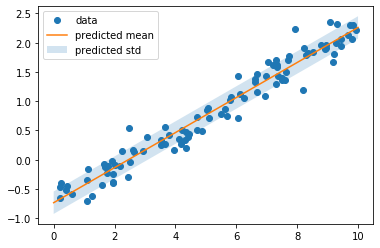

In [18]:
plt.plot(x_data, y_data, 'o', label="data")
plt.plot(xx, y_line_mle, label="predicted mean")
plt.fill_between(xx, y_line_mle+sigma_e_mle, y_line_mle-sigma_e_mle, alpha=0.2, label="predicted std")
plt.legend()

We can also visualize this in a different way:

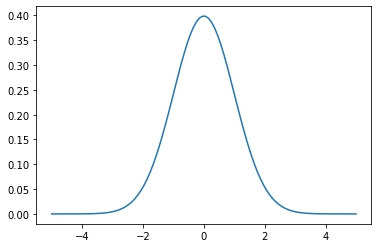

In [19]:
# just a normal pdf

def normal_pdf(x, m, s):
    return 1./(s*np.sqrt(2*np.pi))*np.exp(-0.5 * (x - m)**2 / (s**2))

xx = np.linspace(-5,5,100)
plt.plot(xx, normal_pdf(xx,0,1.))

In [20]:
y_min = -1
y_max = 2.5
x_min = 0
x_max = 10

In [21]:
xx = np.linspace(x_min, x_max, 101)
yy = np.linspace(y_min, y_max, 201)

In [22]:
likelihood = np.zeros((101,201))

for i, x in enumerate(xx):
    likelihood[i,:] = normal_pdf(yy[::-1], y_line_mle[i], sigma_e_mle)

In [23]:
likelihood

array([[3.65015655e-62, 1.69362973e-61, 7.79308167e-61, ...,
        1.00822940e+00, 8.99611136e-01, 7.96038496e-01],
       [5.02148810e-61, 2.29694331e-60, 1.04196204e-59, ...,
        8.25336166e-01, 7.26000976e-01, 6.33325994e-01],
       [6.74156476e-60, 3.04011080e-59, 1.35957100e-58, ...,
        6.59340454e-01, 5.71777304e-01, 4.91731334e-01],
       ...,
       [6.17144034e-01, 7.08529503e-01, 8.06701979e-01, ...,
        1.37274733e-59, 3.03075271e-60, 6.63581355e-61],
       [7.77723938e-01, 8.80253442e-01, 9.88038294e-01, ...,
        1.02939040e-60, 2.24053054e-61, 4.83621281e-62],
       [9.56470819e-01, 1.06724678e+00, 1.18097787e+00, ...,
        7.53315574e-62, 1.61643618e-62, 3.43972686e-63]])

Text(0.5, 1.0, 'Likelihood Heatmap')

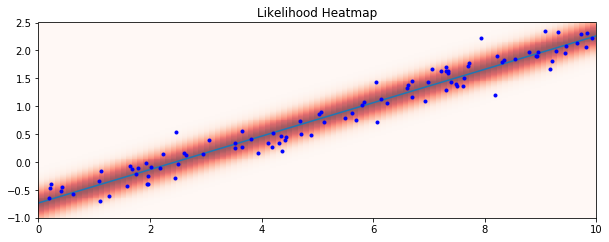

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

ax.imshow(likelihood.T, extent=[x_min, x_max, y_min, y_max], cmap="Reds", alpha=0.65)
ax.plot(xx, y_line_mle)
ax.plot(x_data, y_data, '.', c="blue", label="data")
ax.set_title("Likelihood Heatmap")


Our model assumes a Standard Normal PDF for each $x$, centered at $y(x)$, and with variance $\sigma_e$.

This is the marginal distribution $p(t \vert x,w) = \mathcal{N}(t; y(x,\mathbf{w}), \sigma_e)$

We can also directly calculate the (log-) likelihood of all data points under a given model:

In [25]:
X_data = np.vander(x_data, 2)
y_pred = X_data @ W

In [26]:
y_pred.shape

(100, 50)

In [27]:
logProb_data = np.zeros((N_model, N_data))

for i_model in range(N_model):
    logProb_data[i_model] = -np.power(y_pred[:,i_model] - y_data, 2)

Let's figure out, which model is most likely

In [28]:
logProb_models = logProb_data.sum(axis=1)
argmax_indices = logProb_models.argsort()[::-1]

argmax_indices

array([15, 35, 43, 44, 22,  4, 25, 29, 11, 38, 32, 33, 40, 23,  0, 12, 47,
       34, 10, 48, 18, 30, 49, 17, 24,  1, 28, 26, 13, 21, 14, 39, 19, 27,
        7, 31,  9,  2, 20,  8, 46, 37, 16,  5,  3, 42, 41, 45,  6, 36],
      dtype=int64)

In [29]:
i = argmax_indices[0]
W[:,i]

array([ 0.19576003, -0.2255629 ])

... and plot the most likely models:

0 15 -12.740705835156078
1 35 -13.84375569241729
2 43 -26.475860916159977
3 44 -35.03870116913397
4 22 -41.56840964910695
5 4 -46.230433729403536
6 25 -46.71078392730948
7 29 -46.885781445068005
8 11 -62.3635263064739
9 38 -68.1577792545079


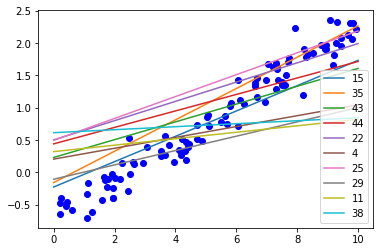

In [30]:
plt.plot(x_data, y_data, 'o', color="blue")

for i in range(10):
    j = argmax_indices[i]
    plt.plot(xx, y[:, j], label=f"{j}")
    print(i, j, logProb_models[j])
    
plt.legend()

### Bayesian Inference

In a Bayesian setting, we can use _Bayes' Rule_:

$$ \text{posterior} = \frac{\text{likelihood} \times \text{prior}}{\text{marginal likelihood}} $$


$$
p(\mathbf{w} \vert \mathbf{t}, \mathbf{x} ) = \frac{p(\mathbf{t} \vert \mathbf{x}, \mathbf{w}) \cdot p(\mathbf{w})}{\int p(\mathbf{t} \vert \mathbf{x}, \mathbf{w}) \cdot p(\mathbf{w}) \, dw }
$$

So for this, we need a prior over the weights. Let's again use a simple Normal distribution:

$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w};\mathbf{m},S) = \frac{1}{(2\pi)^{n/2} \vert S \vert^{1/2}} \exp \left( - \frac{1}{2}\mathbf{w}^T S^{-1}  \mathbf{w} \right) \qquad 
$$

In [31]:
S = np.array([[0.1, 0], [0., 0.5]])

In [32]:
np.linalg.inv(S)
s = np.diag(S)

In [33]:
S

array([[0.1, 0. ],
       [0. , 0.5]])

In [34]:
w0 = np.linspace(-2, 2, 101)
w1 = np.linspace(-2, 2, 101)
p0 = np.zeros((101,101))

for i in range(101):
    for j in range(101):
        p0[i,j] = np.exp(-0.5*(S[0,0]*w0[i]**2 + S[1,1]*w1[j]**2 ))

Text(0, 0.5, 'W1')

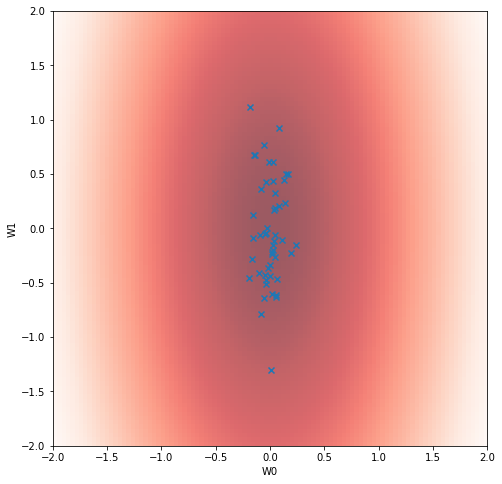

In [35]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(p0, extent=[-2, 2, -2, 2], cmap="Reds", alpha=0.65)
ax.scatter(W[0,:], W[1,:], marker="x")
ax.set_xlabel("W0")
ax.set_ylabel("W1")

### Given the following equations, can you draw the posterior in function and weight space?

$$
p(\mathbf{w} \vert \mathbf{t}, \mathbf{x} ) \propto p(\mathbf{t} \vert \mathbf{x}, \mathbf{w}) \cdot p(\mathbf{w})
$$

$$
p(\mathbf{w} \vert \mathbf{t}, \mathbf{x} )  \propto \exp \left( - \frac{1}{2}(\mathbf{t} - \mathbf{y}(\mathbf{w},\mathbf{x}))^T \Sigma_e^{-1}  (\mathbf{t} - \mathbf{y}(\mathbf{w},\mathbf{x})) \right) \cdot \exp \left( - \frac{1}{2}\mathbf{w}^T S^{-1}  \mathbf{w} \right)
$$

$$
\Rightarrow \ln p(\mathbf{w} \vert \mathbf{t}, \mathbf{x} )  \propto - \frac{1}{2}(\mathbf{t} - \mathbf{y}(\mathbf{w},\mathbf{x}))^T \Sigma_e^{-1}  (\mathbf{t} - \mathbf{y}(\mathbf{w},\mathbf{x}))  - \frac{1}{2}\mathbf{w}^T S^{-1}  \mathbf{w} 
$$

In [36]:
logProb_data = np.zeros((N_model, N_data))

for i_model in range(N_model):
    logProb_data[i_model] = -np.power(y_pred[:,i_model] - y_data, 2)

In [37]:

for i in range(101):
    for j in range(101):
        p0_W[i,j] = np.exp(-0.5*(S[0,0]*w0[i]**2 + S[1,1]*w1[j]**2 ))

In [38]:
p0.shape,logProb_data.shape


((101, 101), (50, 100))

In [39]:
sigma_e_mle

0.19177977170936022

In [48]:
W[:,15]

array([ 0.19576003, -0.2255629 ])

In [53]:
MAX_pos = -0.5*np.sum(np.power(y_pred[:,15] - y_data, 2))*sigma_e_mle - 0.5*(0.1*0.19576003**2+0.5*-0.2255629**2)


In [55]:
MAX_pos

-1.221704828241173

In [54]:
MAX_pos

-1.221704828241173

### For Reference: 
Multivariate Normal:

$$
\mathcal{N}(\mathbf{x}; \boldsymbol	{\mu}, \Sigma) = \frac{1}{(2\pi)^{n/2} \vert \Sigma \vert^{1/2}} \exp \left( - \frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1}  (\mathbf{x} - \boldsymbol{\mu}) \right) \qquad \mathbf{x}, \boldsymbol{\mu} \in \mathbb{R}^n, \Sigma \in \mathbb{R}^{n \times n}
$$

$$
\mathcal{N}(\mathbf{x}; \boldsymbol	{\mu}, \Sigma) \propto \exp \left( - \frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1}  (\mathbf{x} - \boldsymbol{\mu}) \right) \qquad \mathbf{x}, \boldsymbol{\mu} \in \mathbb{R}^n, \Sigma \in \mathbb{R}^{n \times n}
$$

Prior:
$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w};\mathbf{m},S) = \frac{1}{(2\pi)^{n/2} \vert S \vert^{1/2}} \exp \left( - \frac{1}{2}\mathbf{w}^T S^{-1}  \mathbf{w} \right) \qquad 
$$

Likelihood:
$$
p(\mathbf{t} \vert \mathbf{x}, \mathbf{w}) = \mathcal{N}(\mathbf{t}; \mathbf{y}(\mathbf{w},\mathbf{x}), \Sigma_e) = \frac{1}{(2\pi)^{n/2} \vert \Sigma_e \vert^{1/2}} \exp \left( - \frac{1}{2}(\mathbf{t} - \mathbf{y}(\mathbf{w},\mathbf{x}))^T \Sigma_e^{-1}  (\mathbf{t} - \mathbf{y}(\mathbf{w},\mathbf{x})) \right) \qquad
$$